# Intruduction to MelGeneralizedCepstrums.jl

This notebook shows the basic usage of MelGeneralizedCepstrums.jl.

## Preparation

- Configure visualization settings (using PyPlot in this notebook)
- Loading and audio file (using WAV package)

In [1]:
using PyCall
matplotlib = pyimport("matplotlib")
PyDict(matplotlib["rcParams"])["figure.figsize"] = (12, 5)
using PyPlot

In [2]:
import SPTK
using WAV
using DSP
using MelGeneralizedCepstrums

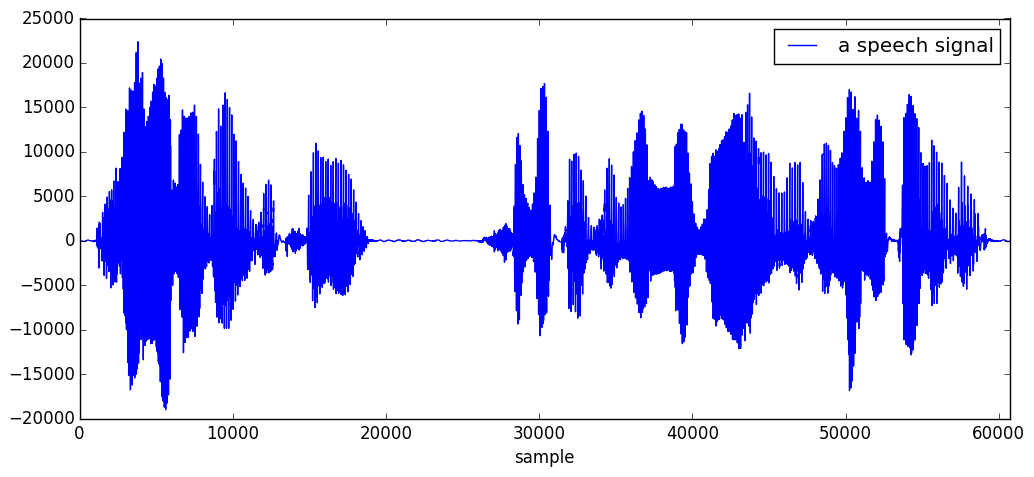

PyObject <matplotlib.legend.Legend object at 0x7fc2510d4190>

In [3]:
x, fs = wavread(joinpath(Pkg.dir("SPTK"), "examples", "test16k.wav"), format="native")
x = convert(Vector{Float64}, vec(x))

# Visualize the speech signal in time-domain
plot(1:endof(x), x, label="a speech signal")
xlim(1, endof(x))
xlabel("sample")
legend()

## Windowing

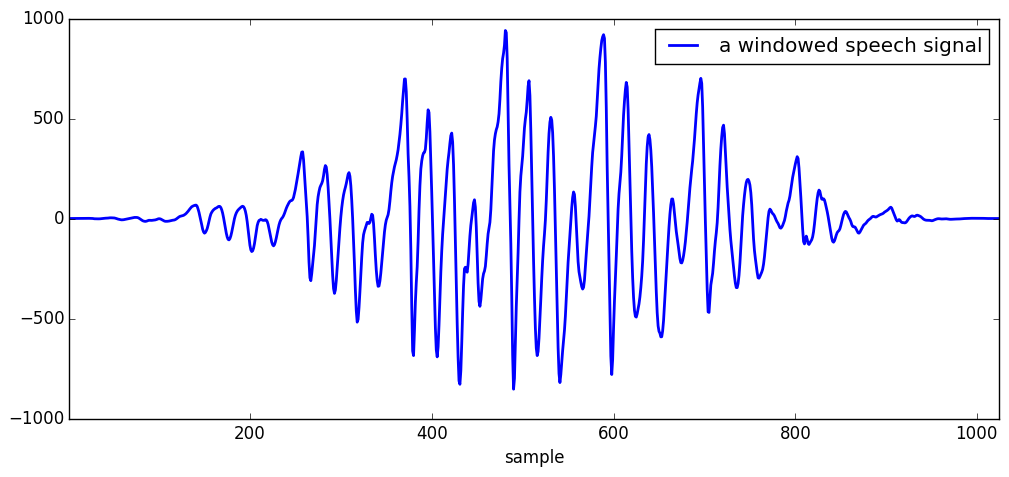

PyObject <matplotlib.legend.Legend object at 0x7fc250f417d0>

In [4]:
# Pick a short segment
pos = 3000
fftlen = 1024
# Note that mel-generalized cepstrum analysis basically assumes window is power-normalized.
xw = x[pos+1:pos+fftlen] .* SPTK.blackman(fftlen)

plot(1:endof(xw), xw, linewidth="2", label="a windowed speech signal")
xlim(1, endof(xw))
xlabel("sample")
legend()

## Mel-generalized cepstrum analysis

In [5]:
# Plotting utility for visualizing spectral envelope estimate
function pplot(sp, envelope; title="envelope")
    plot(sp, "b-", linewidth="2", label="Original log spectrum 20log|X(ω)|")
    plot(20/log(10)*(envelope), "r-", linewidth="3", label=title)
    xlim(1, length(sp))
    xlabel("frequency bin")
    ylabel("log amplitude")
    legend()
end

pplot (generic function with 1 method)

In [6]:
# Compute spectrum 20log|X(ω)| for a windowed signal
sp = 20log10(abs(rfft(xw)));

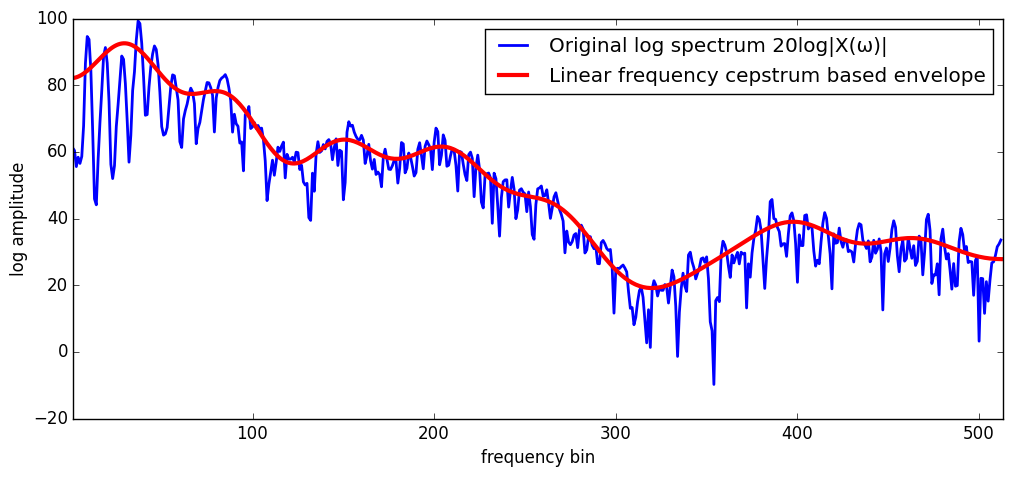

PyObject <matplotlib.legend.Legend object at 0x7fc25017ca10>

In [7]:
# Linear Cepstrum
c = estimate(LinearCepstrum(20), xw)
pplot(sp, real(mgc2sp(c, fftlen)), title="Linear frequency cepstrum based envelope")

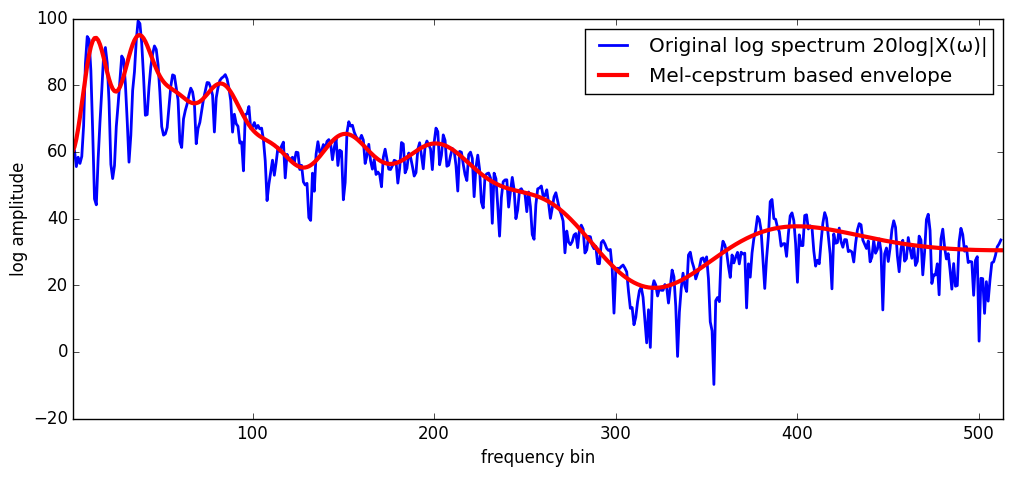

PyObject <matplotlib.legend.Legend object at 0x7fc2500c60d0>

In [8]:
# Mel-Cepstrum
mc = estimate(MelCepstrum(20, 0.41), xw)
pplot(sp, real(mgc2sp(mc, fftlen)), title="Mel-cepstrum based envelope")

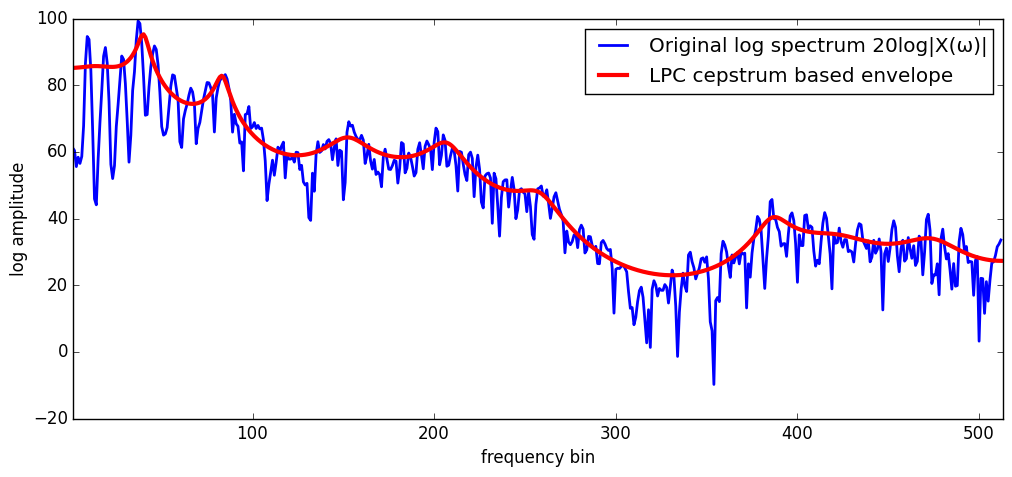

PyObject <matplotlib.legend.Legend object at 0x7fc250002d10>

In [9]:
# LPC Cepstrum 
mgc = estimate(AllPoleCepstrum(20), xw)
pplot(sp, real(mgc2sp(mgc, fftlen)), title="LPC cepstrum based envelope")

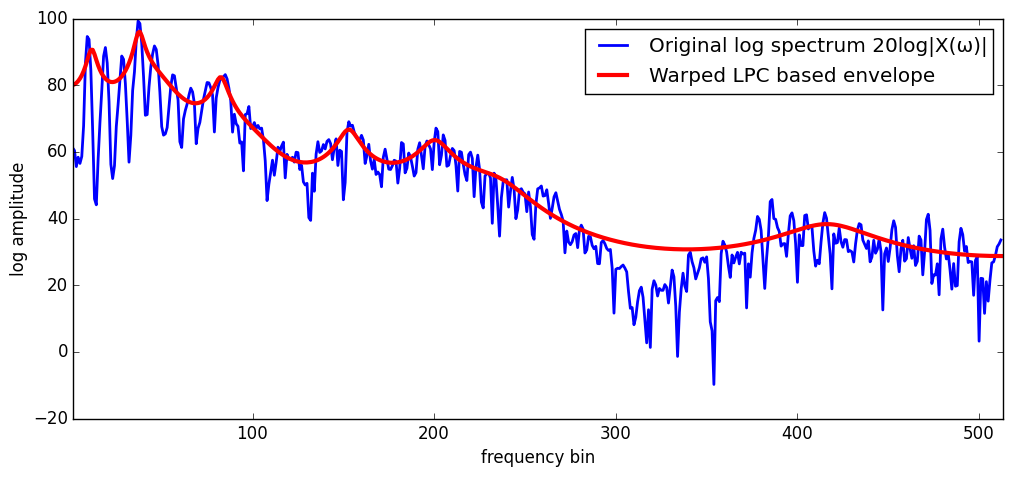

PyObject <matplotlib.legend.Legend object at 0x7fc24ff4cad0>

In [10]:
# Warped LPC
mgc = estimate(MelGeneralizedCepstrum(20, 0.41, -1.0), xw)
pplot(sp, real(mgc2sp(mgc, fftlen)), title="Warped LPC based envelope")

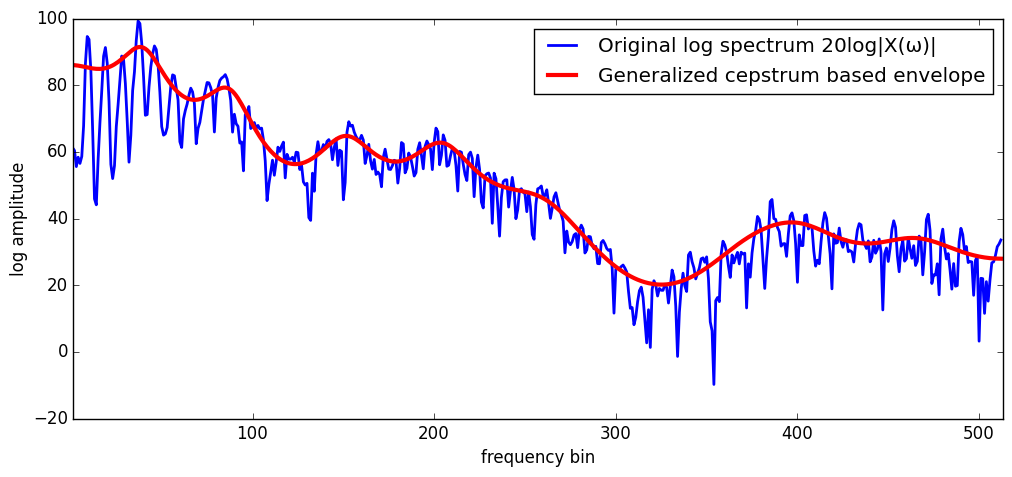

PyObject <matplotlib.legend.Legend object at 0x7fc24fe959d0>

In [11]:
# Generalized Cepstrum
mgc = estimate(GeneralizedCepstrum(20, -0.35), xw)
pplot(sp, real(mgc2sp(mgc, fftlen)), title="Generalized cepstrum based envelope")

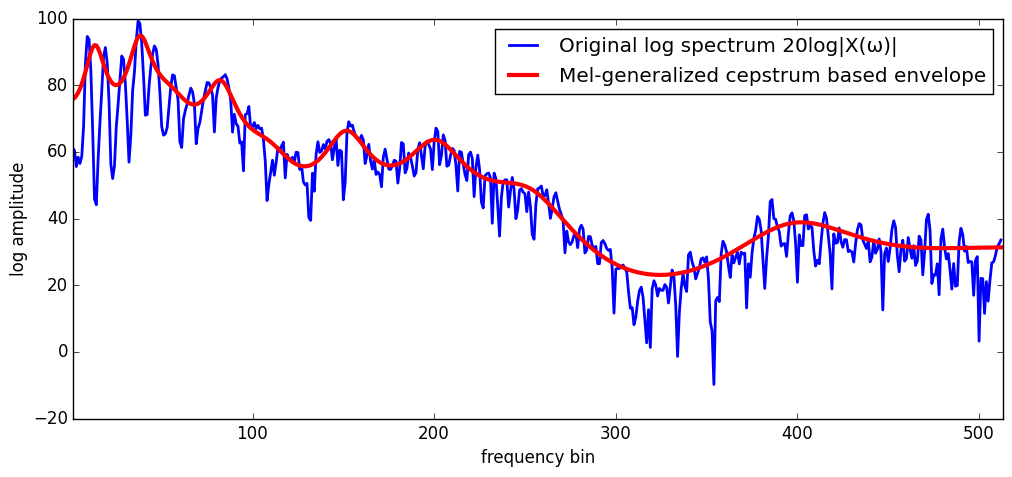

PyObject <matplotlib.legend.Legend object at 0x7fc24fdde8d0>

In [12]:
# Mel-Generalized Cepstrum
mgc = estimate(MelGeneralizedCepstrum(20, 0.41, -0.35), xw)
pplot(sp, real(mgc2sp(mgc, fftlen)), title="Mel-generalized cepstrum based envelope")